In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
train_dir = '/content/drive/MyDrive/Asirra: cat vs dogs/train'
test_dir = '/content/drive/MyDrive/Asirra: cat vs dogs/test'
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(os.path.join(train_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'dogs'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'cats'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'dogs'), exist_ok=True)

# Split data
train_images, test_images, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=0.2, random_state=42
)

# Helper function to move images
def move_images(image_paths, labels, dest_dir):
    for img_path, label in zip(image_paths, labels):
        category = 'dogs' if label == 1 else 'cats'
        dest_path = os.path.join(dest_dir, category, os.path.basename(img_path))
        shutil.copy(img_path, dest_path)

# Move images
move_images(train_images, train_labels, train_dir)
move_images(test_images, test_labels, test_dir)

print("Images have been successfully moved to train and test directories.")


Images have been successfully moved to train and test directories.


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 880 images belonging to 2 classes.
Found 220 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [ ]:
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])

    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

model = create_model()
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_images) // 32,
    epochs=15,
    validation_data=test_generator,
    validation_steps=len(test_images) // 32
)


Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.5257 - loss: 0.7094 - val_accuracy: 0.5052 - val_loss: 0.6915
Epoch 2/15
 1/27 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.3750 - loss: 0.6951

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3750 - loss: 0.6951 - val_accuracy: 0.6786 - val_loss: 0.6887
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.4832 - loss: 0.6930 - val_accuracy: 0.4635 - val_loss: 0.6936
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5357 - val_loss: 0.6927
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5093 - loss: 0.6931 - val_accuracy: 0.5208 - val_loss: 0.6916
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4062 - loss: 0.6944 - val_accuracy: 0.5714 - val_loss: 0.6902
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5487 - loss: 0.6920 - val_accuracy: 0.5260 - val_loss: 0.6821
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 173ms/step - accuracy: 0.3438 - loss: 0.6929 - val_accuracy: 0.5357 - val_loss: 0.6886
Epoch 9/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5518 - loss: 0.6900 - val_accuracy: 0.4688 - val_loss: 0.691

In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_images) // 32)
print(f"Test accuracy: {test_acc:.2f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 495ms/step - accuracy: 0.4807 - loss: 0.6934
Test accuracy: 0.46


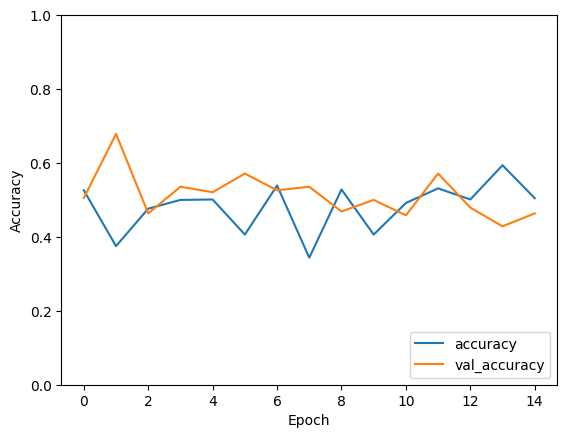

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

plot_history(history)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


<ipython-input-24-6b0059b47d28>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True Label: {class_names[int(true_label)]}\nPredicted Label: {class_names[int(predicted_label)]}")


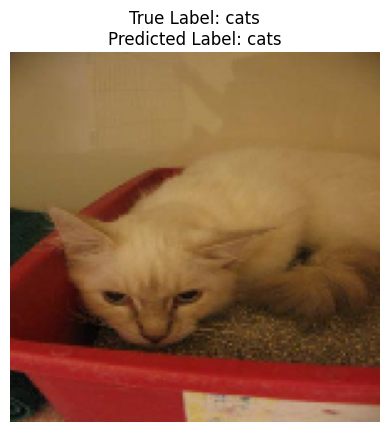

In [ ]:
def display_test_image_with_prediction(model, test_generator):
    # Get a batch of images and labels from the test generator
    images, labels = next(test_generator)

    # Make predictions
    predictions = model.predict(images)

    # Get the index of the image to display (we'll pick the first one in the batch)
    index = 0
    img = images[index]
    true_label = labels[index]
    predicted_label = (predictions[index] > 0.5).astype(int)

    # Define class names
    class_names = ['cats', 'dogs']

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title(f"True Label: {class_names[int(true_label)]}\nPredicted Label: {class_names[int(predicted_label)]}")
    plt.show()

# Example usage
display_test_image_with_prediction(model, test_generator)
